In [1]:
import sys
import importlib
import os
import matplotlib.pyplot as plt
import pandas as pd
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [16]:
from src.dataLoaders.PatientDataLoader import PatientDataProcessor
importlib.reload(sys.modules['src.dataLoaders.PatientDataLoader'])

<module 'src.dataLoaders.PatientDataLoader' from 'c:\\Datalogi\\Bachelor\\XAI-in-Medical-Image-Analysis\\src\\dataLoaders\\PatientDataLoader.py'>

In [17]:
meta_folder = 'OAIData21/'
data_path = '../datasets/meta_data/' + meta_folder

processor = PatientDataProcessor(base_path=data_path)
meta_data = processor.load_all_clinical_data(labels=["WOMKP"])


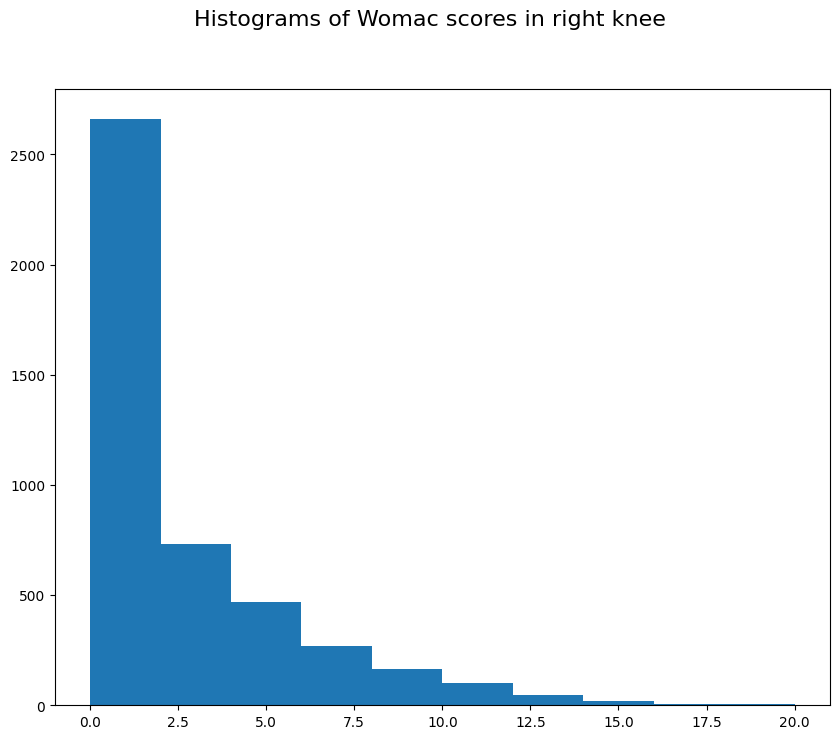

In [19]:
womac_right_knee = meta_data['V01WOMKPR']
womac_right_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

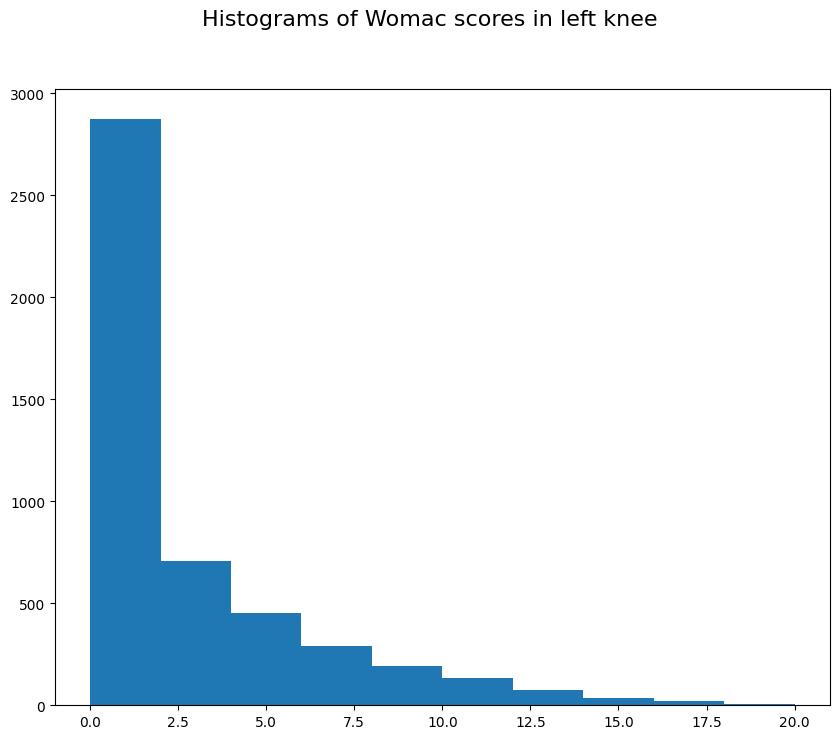

In [20]:
womac_left_knee = meta_data['V00WOMKPL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

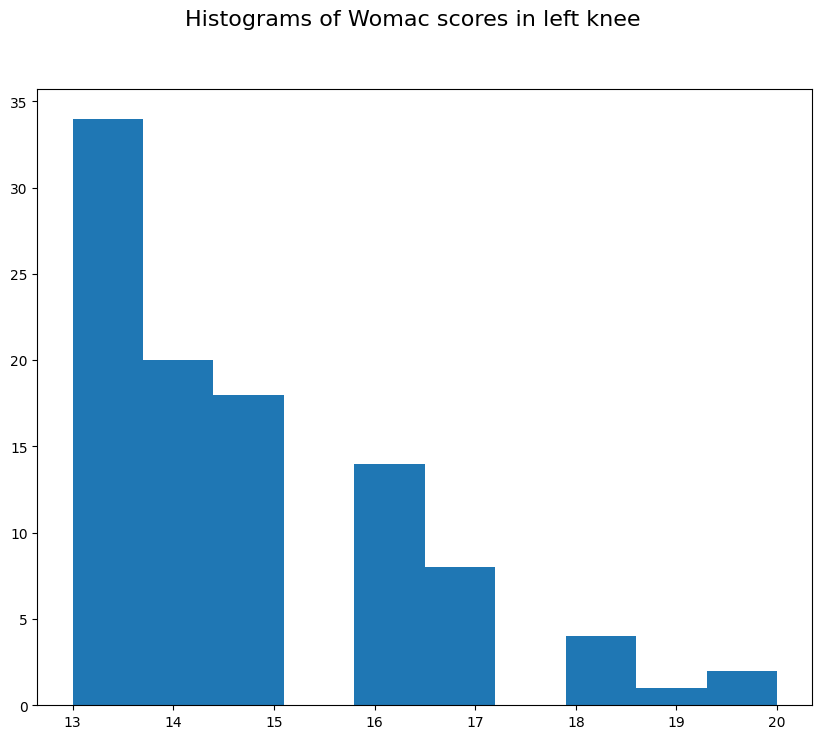

In [21]:
trunc_data = meta_data[meta_data['V00WOMKPL'] >= 13]
womac_left_knee = trunc_data['V00WOMKPL']
womac_left_knee.hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in left knee', fontsize=16)
plt.show()

In [7]:
# def sample_uniformly(df, feature, n_samples):
#     """
#     Sample n_samples rows uniformly distributed according to the specified feature.

#     Parameters:
#     - df: pandas DataFrame
#     - feature: str, the name of the feature to sample uniformly
#     - n_samples: int, total number of samples desired

#     Returns:
#     - pandas DataFrame containing the sampled rows
#     """
#     unique_values = df[feature].unique()
#     n_unique_values = len(unique_values)

#     # Calculate number of samples per unique value
#     samples_per_value = max(1, n_samples // n_unique_values)

#     sampled_df_list = []
#     for value in unique_values:
#         value_group = df[df[feature] == value]
#         sampled_value_group = value_group.sample(n=min(samples_per_value, len(value_group)), replace=False)
#         sampled_df_list.append(sampled_value_group)

#     sampled_df = pd.concat(sampled_df_list).sample(n=n_samples, replace=False).reset_index(drop=True)
#     return sampled_df


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

def sample_uniformly(df, feature, n_samples):
    """
    Sample n_samples rows uniformly distributed according to the specified feature.

    Parameters:
    - df: pandas DataFrame
    - feature: str, the name of the feature to sample uniformly
    - n_samples: int, total number of samples desired

    Returns:
    - pandas DataFrame containing the sampled rows
    """
    # Create a StratifiedShuffleSplit object
    sss = StratifiedShuffleSplit(n_splits=1, test_size=n_samples, random_state=0)

    # Get the indices for the stratified sample
    for _, index in sss.split(df, df[feature]):
        sampled_df = df.iloc[index]

    return sampled_df

In [20]:

womac_right_knee_uni = sample_uniformly(meta_data, 'V00WOMKPR', 1)
womac_right_knee_uni['V00WOMKPR'].hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histograms of Womac scores in right knee', fontsize=16)
plt.show()

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
data.shape

(4796, 170)